## Foundations of Data Analysis 1 - Week 6 - Worldwide Trends in Internet Usage

![title](images/week16.jpg)

The World Bank is a data collection of information on all the world’s countries. Data is collected by country, and include items such as total population, CO2 emissions, and the number of mobile device subscriptions. We will examine some of the trends in this dataset and interpret the parameters of the fitted models to best describe the change over time.

**What model best describes the first decade of internet usage (1990-1999) in the United States? Which model is a better long-term fit?**

In [1]:
world <- read.csv("data/WorldBankData.csv")
head(world)

,Country,Country.Code,year,Region,IncomeGroup,population,rural.population,hiv.cases,san.access,motor.vehicles,gas.price,co2.emission,mobile.users,internet.users
,<fct>,<fct>,<int>,<fct>,<fct>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,Aruba,ABW,1960,Latin America & Caribbean,High income,54208,26683,NA,NA,NA,NA,NA,0,NA
2,Aruba,ABW,1961,Latin America & Caribbean,High income,55435,27296,NA,NA,NA,NA,NA,NA,NA
3,Aruba,ABW,1962,Latin America & Caribbean,High income,56226,27694,NA,NA,NA,NA,NA,NA,NA
4,Aruba,ABW,1963,Latin America & Caribbean,High income,56697,27934,NA,NA,NA,NA,NA,NA,NA
5,Aruba,ABW,1964,Latin America & Caribbean,High income,57029,28107,NA,NA,NA,NA,NA,NA,NA
6,Aruba,ABW,1965,Latin America & Caribbean,High income,57360,28278,NA,NA,NA,NA,NA,0,NA


In [2]:
str(world)

'data.frame':	13303 obs. of  14 variables:
 $ Country         : Factor w/ 251 levels "Afghanistan",..: 11 11 11 11 11 11 11 11 11 11 ...
 $ Country.Code    : Factor w/ 251 levels "ABW","AFG","AGO",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ year            : int  1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 ...
 $ Region          : Factor w/ 8 levels "","East Asia & Pacific",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ IncomeGroup     : Factor w/ 5 levels "","High income",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ population      : num  54208 55435 56226 56697 57029 ...
 $ rural.population: num  26683 27296 27694 27934 28107 ...
 $ hiv.cases       : int  NA NA NA NA NA NA NA NA NA NA ...
 $ san.access      : num  NA NA NA NA NA NA NA NA NA NA ...
 $ motor.vehicles  : int  NA NA NA NA NA NA NA NA NA NA ...
 $ gas.price       : num  NA NA NA NA NA NA NA NA NA NA ...
 $ co2.emission    : num  NA NA NA NA NA NA NA NA NA NA ...
 $ mobile.users    : num  0 NA NA NA NA 0 NA NA NA NA ...
 $ internet.users  : num  NA NA NA NA N

**What is the first “Low Income” country in the dataset?**

In [3]:
worincome <- table(world$IncomeGroup)
worincome


                            High income          Low income Lower middle income 
               1961                3975                1908                2544 
Upper middle income 
               2915 

In [4]:
worldlow <-world[world$IncomeGroup == "Low income",]
head(worldlow)

,Country,Country.Code,year,Region,IncomeGroup,population,rural.population,hiv.cases,san.access,motor.vehicles,gas.price,co2.emission,mobile.users,internet.users
,<fct>,<fct>,<int>,<fct>,<fct>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
54,Afghanistan,AFG,1960,South Asia,Low income,8774440,8073099,NA,NA,NA,NA,414.371,0,NA
55,Afghanistan,AFG,1961,South Asia,Low income,8953544,8213534,NA,NA,NA,NA,491.378,NA,NA
56,Afghanistan,AFG,1962,South Asia,Low income,9141783,8361349,NA,NA,NA,NA,689.396,NA,NA
57,Afghanistan,AFG,1963,South Asia,Low income,9339507,8516790,NA,NA,NA,NA,707.731,NA,NA
58,Afghanistan,AFG,1964,South Asia,Low income,9547131,8680156,NA,NA,NA,NA,839.743,NA,NA
59,Afghanistan,AFG,1965,South Asia,Low income,9765015,8851693,NA,NA,NA,NA,1008.425,0,NA


**What was the rural population of Aruba in 1970?**

In [5]:
which(world$Country == "Aruba" & world$year == 1970)

[1] 11

In [6]:
world[11,]

,Country,Country.Code,year,Region,IncomeGroup,population,rural.population,hiv.cases,san.access,motor.vehicles,gas.price,co2.emission,mobile.users,internet.users
,<fct>,<fct>,<int>,<fct>,<fct>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
11,Aruba,ABW,1970,Latin America & Caribbean,High income,59065,29164,NA,NA,NA,NA,NA,0,NA


**When was the first year Australia had data on the number of mobile device subscriptions?**

In [7]:
Australia <-world[world$Country == "Australia",]
numberaust <-Australia[Australia$mobile.users > 0,]
numberaust[10:15,]

,Country,Country.Code,year,Region,IncomeGroup,population,rural.population,hiv.cases,san.access,motor.vehicles,gas.price,co2.emission,mobile.users,internet.users
,<fct>,<fct>,<int>,<fct>,<fct>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
NA.9,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.10,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.11,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
611,Australia,AUS,1987,East Asia & Pacific,High income,16263900,2368674,NA,NA,NA,NA,256106.9,4409,NA
612,Australia,AUS,1988,East Asia & Pacific,High income,16532200,2409733,NA,NA,NA,NA,261145.4,31516,NA
613,Australia,AUS,1989,East Asia & Pacific,High income,16814400,2452885,NA,NA,NA,NA,277771.6,94323,NA


## Prepare for the Analysis

Create a subset of the dataset that contains only the information for the United States.

In [8]:
us <- world[world$Country.Code == "USA",]
head(us)

,Country,Country.Code,year,Region,IncomeGroup,population,rural.population,hiv.cases,san.access,motor.vehicles,gas.price,co2.emission,mobile.users,internet.users
,<fct>,<fct>,<int>,<fct>,<fct>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
12615,United States,USA,1960,North America,High income,180671000,54208527,NA,NA,NA,NA,2890696,0,NA
12616,United States,USA,1961,North America,High income,183691000,54422867,NA,NA,NA,NA,2880506,NA,NA
12617,United States,USA,1962,North America,High income,186538000,54563857,NA,NA,NA,NA,2987208,NA,NA
12618,United States,USA,1963,North America,High income,189242000,54642114,NA,NA,NA,NA,3119231,NA,NA
12619,United States,USA,1964,North America,High income,191889000,54683760,NA,NA,NA,NA,3255995,NA,NA
12620,United States,USA,1965,North America,High income,194303000,54639947,NA,NA,NA,NA,3390923,0,NA


Create a subset that contains only the USA data for the years 1990 and beyond .

In [9]:
us_select <- us[us$year >= 1990, ]
head(us_select)

,Country,Country.Code,year,Region,IncomeGroup,population,rural.population,hiv.cases,san.access,motor.vehicles,gas.price,co2.emission,mobile.users,internet.users
,<fct>,<fct>,<int>,<fct>,<fct>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
12645,United States,USA,1990,North America,High income,249623000,61656881,NA,248382203,NA,NA,4768138,5181680,1958863
12646,United States,USA,1991,North America,High income,252981000,61499681,NA,NA,NA,NA,4826703,7436741,2942659
12647,United States,USA,1992,North America,High income,256514000,61358149,NA,NA,NA,0.32,4922196,10899406,4422821
12648,United States,USA,1993,North America,High income,259919000,61158941,NA,NA,NA,NA,5029767,15864719,5904511
12649,United States,USA,1994,North America,High income,263126000,60887356,NA,NA,NA,NA,5121560,23957416,12795240
12650,United States,USA,1995,North America,High income,266278000,60578245,NA,265291863,NA,0.34,5156169,33563609,24596334


Create a new variable in our datset called internet.mil to make the number of users more interpretable (into millions).

In [10]:
us_select$internet.mil <- us_select$internet.users / 1000000
head(us_select$internet.mil)

[1]  1.958863  2.942659  4.422821  5.904511 12.795240 24.596334

Create a new variable in our dataset called time that represents "years since 1990".

In [11]:
us_select$time <- us_select$year - 1990
head(us_select$time)

[1] 0 1 2 3 4 5

Select the first 10 years (from 1990 to 1999) and name the new data frame "us_select_10"​.

In [12]:
us_select_10 <- us_select[us_select$time < 10,]
us_select_10

,Country,Country.Code,year,Region,IncomeGroup,population,rural.population,hiv.cases,san.access,motor.vehicles,gas.price,co2.emission,mobile.users,internet.users,internet.mil,time
,<fct>,<fct>,<int>,<fct>,<fct>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12645,United States,USA,1990,North America,High income,249623000,61656881,NA,248382203,NA,NA,4768138,5181680,1958863,1.958863,0
12646,United States,USA,1991,North America,High income,252981000,61499681,NA,NA,NA,NA,4826703,7436741,2942659,2.942659,1
12647,United States,USA,1992,North America,High income,256514000,61358149,NA,NA,NA,0.32,4922196,10899406,4422821,4.422821,2
12648,United States,USA,1993,North America,High income,259919000,61158941,NA,NA,NA,NA,5029767,15864719,5904511,5.904511,3
12649,United States,USA,1994,North America,High income,263126000,60887356,NA,NA,NA,NA,5121560,23957416,12795240,12.795240,4
12650,United States,USA,1995,North America,High income,266278000,60578245,NA,265291863,NA,0.34,5156169,33563609,24596334,24.596334,5
12651,United States,USA,1996,North America,High income,269394000,60296304,NA,NA,NA,NA,5286047,43744608,44232752,44.232752,6
12652,United States,USA,1997,North America,High income,272657000,60023803,NA,NA,NA,NA,5419441,54919622,58938630,58.938630,7
12653,United States,USA,1998,North America,High income,275854000,59713012,NA,NA,NA,0.32,5456093,68661825,83013287,83.013287,8


**Use a function to fit an exponential and logistic model for 1990-1999.**

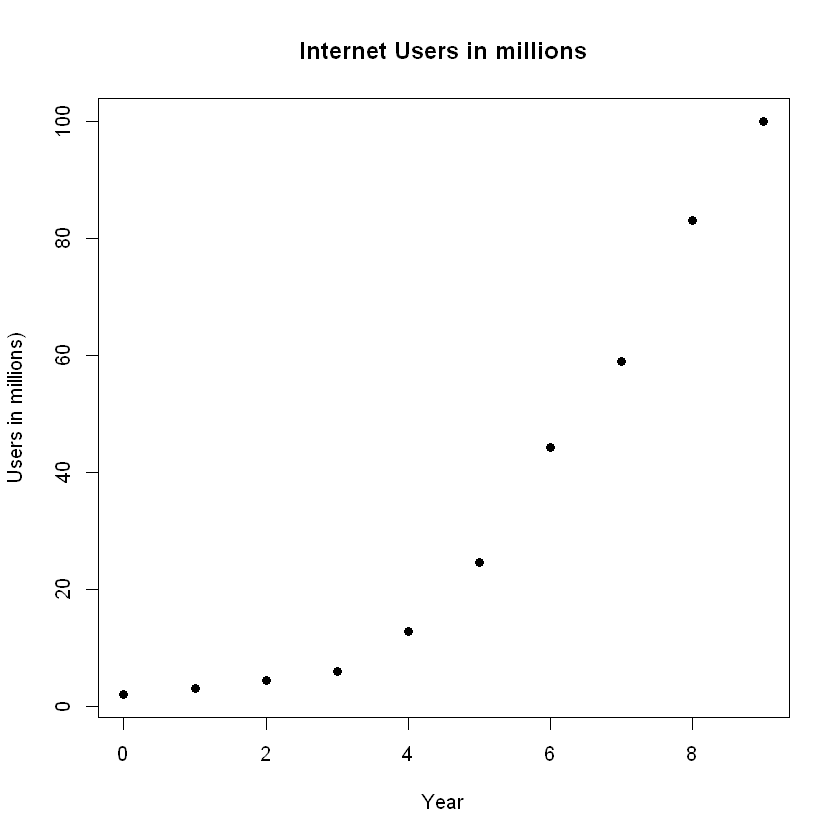

In [13]:
plot(us_select_10$time,us_select_10$internet.mil,main='Internet Users in millions',xlab='Year',ylab='Users in millions)',pch=16)

### Exponential Model

In [14]:
#expFit(us_select_10$time, us_select_10$internet.mil)

exponential.model <- lm(log(us_select_10$internet.mil)~ us_select_10$time)
summary(exponential.model)


Call:
lm(formula = log(us_select_10$internet.mil) ~ us_select_10$time)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.298846 -0.073729  0.005504  0.103382  0.310933 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.62692    0.11917   5.261 0.000764 ***
us_select_10$time  0.47527    0.02232  21.291 2.49e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2028 on 8 degrees of freedom
Multiple R-squared:  0.9827,	Adjusted R-squared:  0.9805 
F-statistic: 453.3 on 1 and 8 DF,  p-value: 2.49e-08


This model is pretty good, though it explains about 98% of the variance.

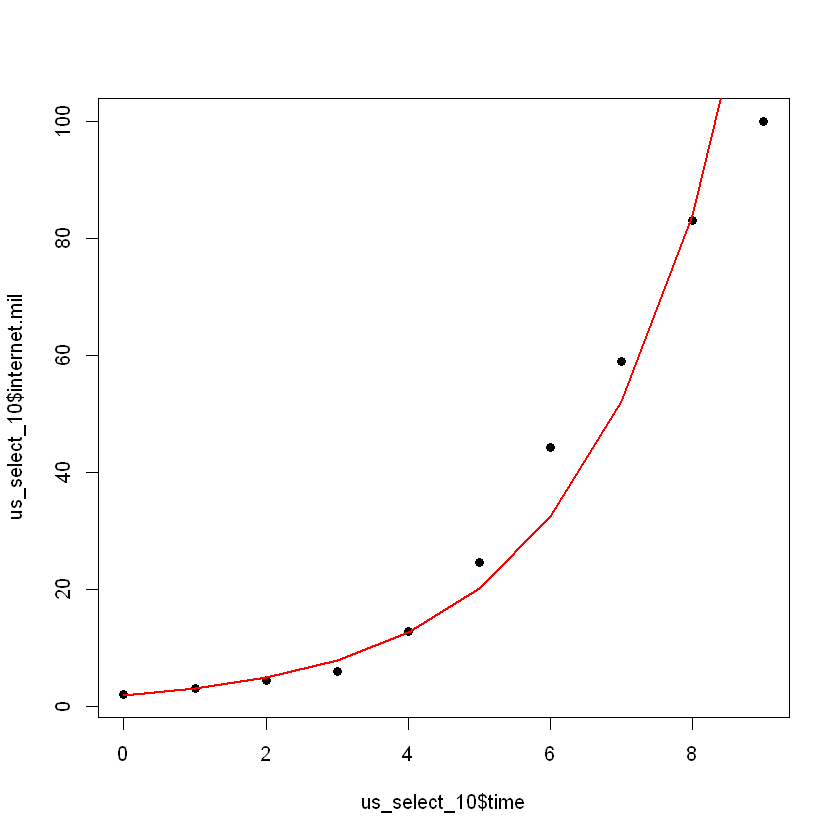

In [15]:
us_select_10$internet.mil.exponential2 <- exp(predict(exponential.model,list(us_select_10$time)))
plot(us_select_10$time, us_select_10$internet.mil,pch=16)
lines(us_select_10$time, us_select_10$internet.mil.exponential2,lwd=2, col = "red")

### Logistic Model

In [16]:
us_select_10$internet.mil

[1]   1.958863   2.942659   4.422821   5.904511  12.795240  24.596334
 [7]  44.232752  58.938630  83.013287 100.032281

In [17]:
summary(us_select_10$internet.mil)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.959   4.793  18.696  33.884  55.262 100.032 

In [18]:
ming <- 1.04406
mingy <- c(ming,us_select_10$internet.mil)
maxg <- 127.7935 
y <- c(mingy,maxg)

minh <- -4
minhx <- c(minh,us_select_10$time)
maxh <- 20 
x <- c(minhx,maxh)

In [19]:
# Normalize y with Min-Max

normalize <- function(y) {
return ((y - min(y)) / (max(y) - min(y)))
}

y <- normalize(y)
y

[1] 0.000000000 0.007217413 0.014979151 0.026657009 0.038346923 0.092711889
 [7] 0.185817578 0.340740693 0.456763912 0.646702873 0.780975608 1.000000000

In [20]:
#logisticFit(us_select_10$time, us_select_10$internet.mil)
#fit_glm = glm(y ~ x, data = example_data, family = binomial)

logistic.model <- glm(y ~ x, data = us_select_10, family = binomial(link = "logit"))
summary(logistic.model)

Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"



Call:
glm(formula = y ~ x, family = binomial(link = "logit"), data = us_select_10)

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
-0.060687  -0.021181   0.003064   0.013869   0.069431  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  -5.0333     3.2099  -1.568    0.117
x             0.7043     0.4771   1.476    0.140

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 7.243138  on 11  degrees of freedom
Residual deviance: 0.011858  on 10  degrees of freedom
AIC: 8.1804

Number of Fisher Scoring iterations: 7


### Based on the prior model parameters, predict the number of internet users in 2006.

Exponential Fit:

    a = 1.87184

    b = 1.60845

Logistic Fit:

    C = 127.7935

    a = 121.4

In [21]:
predicuserExp <- 1.87184*(1.60845)^16
predicuserExp

[1] 3756.555

In [22]:
predicuserLog <- (127.7935)/(1+(121.4)^(-16))
predicuserLog

[1] 127.7935

Real value US internet users in 2006 = 205.7 (in million)

**Exponential Model** = 3756.6 million

R-squared = 0.98266

Residual = 205.7 - 3756.6 = -3550.9 million

**Logistic Model** = 127.8 million

R-squared = 0.99802

Residual = 205.7 - 127.8 = 77.9 million

The logistic model make a better job because it's residual was actually smaller than the exponential function.

**Conclusion:**

**Both the logistic and exponential models** do/does a fairly good job of fitting the pattern of internet usage in the United States from 1990-1999, as shown by R-squared values **greater** than 0.95. If we look ahead to 2006, however, we see that **the 
logistic** model has a better long-term fit. This model predicted **127.5** million users in 2006, with a smaller residual of 
**77.9** million. The **exponential** model predicted far more users than there really were. It appears that the number of new internet users grew rapidly at first but then began to level off over time.